In [1]:
# import dependencies 
import pandas as pd 
import matplotlib.pyplot as lib 
import numpy as np
# Import the API key.
from config import weather_api_key


In [2]:
# store the lat and long
# delcare each array as var 
# 6.1.4

# generate random lat 
lats = np.random.uniform(low=-90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)

# create zip object in memory (packing the two together)
lat_lngs = zip(lats, lngs)
# packed into tuple (1500 of them) and access as 0,1 index form
lat_lngs


In [3]:
# unpack the lat_lngs zip object into list type
# cannot simply print out coordinates on its own without using 0,1 indexing
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

87.80352941864541 167.64104148872548
71.24546825591693 114.8783646753015
80.57417261450931 55.809592843021704
-47.888630313471154 -172.05006842370355
32.12968731046945 -29.462041087926423
78.71287378128233 160.56195105967697
49.90626557063203 -10.438763135478553
-75.26722128881306 17.945233236526036
38.38763455651889 117.02487634997999
43.85808012534059 65.011757297086
47.56203466137282 -62.18781913418873
55.26401263026895 165.27281653794347
-17.325130562017506 62.32365082736169
-38.461090460182014 66.21423637710174
-39.179087506406475 62.933999380154205
-68.99228467788964 112.04874040705823
54.72846050251533 55.08254665641914
77.60931379121908 -130.57972924244936
80.15390614052842 91.46236397195815
76.26103604112507 -14.96996306268008
-52.32674182303269 1.1100878825337759
59.24184822867474 150.60578505074346
-4.3366977823323225 -72.09331103512773
52.96708312708148 -172.64512734115573
50.8297129827954 -53.57535810864803
29.11010646224446 -25.248441781543676
-37.43906108107824 -64.73712

In [5]:
# 6.1.5 generate random wolrd cities 
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# iterate through the coordinates unzipped tuple 
# use citypy and add lat, long
# print the city name, chain the name to the nearest city function
# print the country name, chain the country code to nearest city function 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(cities)
len(cities)

['pevek', 'saskylakh', 'belushya guba', 'vaini', 'ribeira grande', 'cherskiy', 'skibbereen', 'bredasdorp', 'cangzhou', 'tasbuget', 'cap-aux-meules', 'nikolskoye', 'grand gaube', 'souillac', 'saint-philippe', 'albany', 'alekseyevka', 'tuktoyaktuk', 'talnakh', 'illoqqortoormiut', 'cape town', 'magadan', 'iquitos', 'provideniya', 'hare bay', 'los llanos de aridane', 'santa rosa', 'lata', 'busselton', 'bac lieu', 'kazalinsk', 'tazovskiy', 'zyryanka', 'simpang', 'yulara', 'cidreira', 'taolanaro', 'chuy', 'ushuaia', 'fortuna', 'kapaa', 'verkhoyansk', 'hobart', 'rikitea', 'tessalit', 'kodiak', 'el badari', 'dikson', 'bethel', 'alice springs', 'pangnirtung', 'zachagansk', 'mosetse', 'walvis bay', 'sisimiut', 'vaitupu', 'khatanga', 'chernyshevskiy', 'oktyabrskiy', 'port elizabeth', 'tumannyy', 'faanui', 'barrow', 'saint george', 'sakakah', 'san cristobal', 'mys shmidta', 'ahipara', 'constitucion', 'arraial do cabo', 'mar del plata', 'touros', 'krasnokholm', 'chemin grenier', 'leningradskiy', 'e

594

In [7]:
# Import the requests library.
import requests


# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd1fbd1a397ad51b5a5aa7507997d4cf


In [9]:
# 1. import dependencies, initialize counters and a list to hold weather data
import time
from datetime import datetime 

In [ ]:
city_data = []
print("Beginning Data Retrieval           ")
print("-----------------------------------")

# create counters
# initialize to 1 b/c we want first iteration of logging for each response 
record_count = 1
set_count = 1

# fixed version that adds not city index, but name 
# enumerate helps refrence the index and city in list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    # remove blank spaces in city name with .replace
    city_url = url + "&q=" + city.replace(" ","+")

    # create print statement to tell us record and set counts 
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval           
-----------------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | skibbereen
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | cangzhou
Processing Record 10 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 11 of Set 1 | cap-aux-meules
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | grand gaube
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | alekseyevka
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skippin

In [ ]:
# 6.2.7 create the df for city weather data
# now we have a list of dict, use pandas to make our df
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

In [54]:
# 6.3.1 plot lat vs temp
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

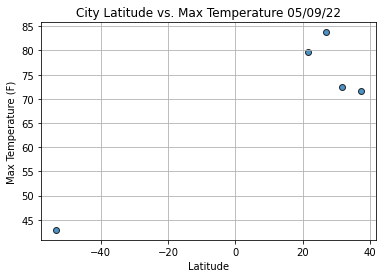

In [55]:
import matplotlib.pyplot as plt

# Import the time module.
import time


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()